In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
ori_dis=pd.read_csv("Disability_by_Type,_2014-2018.csv")

In [5]:
ori_dis.shape

(3220, 201)

In [6]:
disByState=ori_dis.groupby("State").sum()

In [7]:
disByState.head()

,FID,COUNTYNS,GEOID,ALAND,AWATER,OBJECTID,GEOID_1,Total Civilian Noninstitutionalized Population,Total Civilian Noninstitutionalized Population - Margin of Error,Male Civilian Noninstitutionalized Population,...,Population 18 years and over with an independent living difficulty,Population 18 years and over with an independent living difficulty - Margin of Error,Population with one type of disability only,Population with one type of disability only - Margin of Error,Population with two or more types of disability,Population with two or more types of disability - Margin of Error,Population with a disability,Population with a disability - Margin of Error,Shape__Area,Shape__Length
State,,,,,,,,,,,,,,,,,,,,,
Alabama,2278,10827879,71489,1.311740e+11,4593327154,102063,0.0,4785040,13155,2299032,...,283390,25100,391348,29849,389270,29960,780618,42393,155.598702,12.892546
Alaska,2378,45239194,62340,1.478840e+12,245481577452,33783,0.0,714106,4261,365014,...,25072,3072,49008,4761,36887,4077,85895,6318,765.837152,282.049237
Arizona,1560,491942,60208,2.941986e+11,1027337603,24387,0.0,6838270,7674,3361961,...,292514,10361,473755,14015,411339,12548,885094,18873,106.470453,28.917918
Arkansas,11175,5123724,380625,1.347689e+11,2962859592,132392,0.0,2937135,11744,1432567,...,172398,20152,254610,25366,251289,25178,505899,35814,176.599032,13.585389
California,12499,39009250,351364,4.035039e+11,20463871877,130713,0.0,38653948,27629,19066676,...,1621861,48695,2044883,57955,2044802,56109,4089685,80808,253.595561,41.668736


In [8]:
filtered_data=disByState[['\xa0Population under 18 years','\xa0Population under 18 years with one type of disability','\xa0Population under 18 years with two or more types of disability','\xa0Population 18 to 64 years','\xa0Population 18 to 64 years with one type of disability','\xa0Population 18 to 64 years with two or more types of disability','\xa0Population 65 years and over','\xa0Population 65 years and over with one type of disability','\xa0Population 65 years and over with two or more types of disability','\xa0Population with a hearing difficulty','\xa0Population with a vision difficulty', '\xa0Population 5 years and over with a cognitive difficulty', '\xa0Population 5 years and over with an ambulatory difficulty', '\xa0Population 5 years and over with a self-care difficulty','\xa0Population 18 years and over with an independent living difficulty', '\xa0Population with a disability']]

In [9]:
filtered_data.head()

,Population under 18 years,Population under 18 years with one type of disability,Population under 18 years with two or more types of disability,Population 18 to 64 years,Population 18 to 64 years with one type of disability,Population 18 to 64 years with two or more types of disability,Population 65 years and over,Population 65 years and over with one type of disability,Population 65 years and over with two or more types of disability,Population with a hearing difficulty,Population with a vision difficulty,Population 5 years and over with a cognitive difficulty,Population 5 years and over with an ambulatory difficulty,Population 5 years and over with a self-care difficulty,Population 18 years and over with an independent living difficulty,Population with a disability
State,,,,,,,,,,,,,,,,
Alabama,1097072,38816,13177,2924082,215562,200907,763886,136970,175186,203134,145490,295224,445331,155154,283390,780618
Alaska,185685,5161,1567,451328,28891,20128,77093,14956,15192,32428,17152,30196,38460,14588,25072,85895
Arizona,1631619,47000,18660,4059983,235324,190562,1146668,191431,202117,279497,169657,318457,453483,160957,292514,885094
Arkansas,703847,29416,10609,1761927,138760,129713,471361,86434,110967,144985,101641,189628,278592,97807,172398,505899
California,9059370,202801,92291,24374529,1072824,899157,5220049,769258,1053354,1140654,772344,1565088,2127363,951653,1621861,4089685


In [10]:
filtered_data["population under 18 with disability"]=filtered_data["\xa0Population under 18 years with one type of disability"]+filtered_data['\xa0Population under 18 years with two or more types of disability']
filtered_data["population between 18 to 64 with disability"]=filtered_data["\xa0Population 18 to 64 years with one type of disability"]+filtered_data["\xa0Population 18 to 64 years with two or more types of disability"]
filtered_data["population above 64 with disability"]=filtered_data["\xa0Population 65 years and over with one type of disability"]+filtered_data["\xa0Population 65 years and over with two or more types of disability"]

In [11]:
filtered_data.drop(["\xa0Population under 18 years with one type of disability",'\xa0Population under 18 years with two or more types of disability',"\xa0Population 18 to 64 years with one type of disability","\xa0Population 18 to 64 years with two or more types of disability","\xa0Population 65 years and over with one type of disability","\xa0Population 65 years and over with two or more types of disability"],axis=1,inplace=True)

In [12]:
filtered_data.head()

,Population under 18 years,Population 18 to 64 years,Population 65 years and over,Population with a hearing difficulty,Population with a vision difficulty,Population 5 years and over with a cognitive difficulty,Population 5 years and over with an ambulatory difficulty,Population 5 years and over with a self-care difficulty,Population 18 years and over with an independent living difficulty,Population with a disability,population under 18 with disability,population between 18 to 64 with disability,population above 64 with disability
State,,,,,,,,,,,,,
Alabama,1097072,2924082,763886,203134,145490,295224,445331,155154,283390,780618,51993,416469,312156
Alaska,185685,451328,77093,32428,17152,30196,38460,14588,25072,85895,6728,49019,30148
Arizona,1631619,4059983,1146668,279497,169657,318457,453483,160957,292514,885094,65660,425886,393548
Arkansas,703847,1761927,471361,144985,101641,189628,278592,97807,172398,505899,40025,268473,197401
California,9059370,24374529,5220049,1140654,772344,1565088,2127363,951653,1621861,4089685,295092,1971981,1822612


In [13]:
case=pd.read_csv("covid19_nyt_us_counties_BigQuery.csv")
case.head()

,date,county,state_name,county_fips_code,confirmed_cases,deaths
0,2020-03-20,Kansas City,Missouri,NaN,12,0
1,2020-03-21,Kansas City,Missouri,NaN,13,0
2,2020-03-22,Kansas City,Missouri,NaN,13,0
3,2020-03-23,Kansas City,Missouri,NaN,18,0
4,2020-03-24,Kansas City,Missouri,NaN,30,0


In [15]:
state=case.groupby("state_name").max()
state.drop(["county_fips_code","date","county"],axis=1,inplace=True)
state.head()

,confirmed_cases,deaths
state_name,,
Alabama,1474,90
Alaska,195,4
Arizona,5988,250
Arkansas,941,23
California,32258,1569


In [16]:
pop_statewise=pd.read_excel("statepopulation.xlsx")

In [17]:
new_header = pop_statewise.iloc[0] #grab the first row for the header
pop_statewise = pop_statewise[1:] #take the data less the header row
pop_statewise.columns = new_header
pop_statewise.head()

,States,Population
1,.Alabama,4903185
2,.Alaska,731545
3,.Arizona,7278717
4,.Arkansas,3017804
5,.California,39512223


In [18]:
def name(stat):
    try:
        return stat[1:]
    except:
        return "NA"
pop_statewise["States"]=pop_statewise["States"].apply(name)

In [19]:
pop_statewise.set_index('States',inplace=True)

In [20]:
pop_statewise.head()

,Population
States,
Alabama,4903185
Alaska,731545
Arizona,7278717
Arkansas,3017804
California,39512223


In [21]:
temp = pd.concat([state, filtered_data], axis=1, join='inner')
temp.head()

,confirmed_cases,deaths,Population under 18 years,Population 18 to 64 years,Population 65 years and over,Population with a hearing difficulty,Population with a vision difficulty,Population 5 years and over with a cognitive difficulty,Population 5 years and over with an ambulatory difficulty,Population 5 years and over with a self-care difficulty,Population 18 years and over with an independent living difficulty,Population with a disability,population under 18 with disability,population between 18 to 64 with disability,population above 64 with disability
Alabama,1474,90,1097072,2924082,763886,203134,145490,295224,445331,155154,283390,780618,51993,416469,312156
Alaska,195,4,185685,451328,77093,32428,17152,30196,38460,14588,25072,85895,6728,49019,30148
Arizona,5988,250,1631619,4059983,1146668,279497,169657,318457,453483,160957,292514,885094,65660,425886,393548
Arkansas,941,23,703847,1761927,471361,144985,101641,189628,278592,97807,172398,505899,40025,268473,197401
California,32258,1569,9059370,24374529,5220049,1140654,772344,1565088,2127363,951653,1621861,4089685,295092,1971981,1822612


In [22]:
sfinal_table=pd.concat([temp, pop_statewise], axis=1, join='inner')
final_table=sfinal_table[sfinal_table['confirmed_cases'] >= sfinal_table['deaths']] 

In [23]:
final_table.head()

,confirmed_cases,deaths,Population under 18 years,Population 18 to 64 years,Population 65 years and over,Population with a hearing difficulty,Population with a vision difficulty,Population 5 years and over with a cognitive difficulty,Population 5 years and over with an ambulatory difficulty,Population 5 years and over with a self-care difficulty,Population 18 years and over with an independent living difficulty,Population with a disability,population under 18 with disability,population between 18 to 64 with disability,population above 64 with disability,Population
Alabama,1474,90,1097072,2924082,763886,203134,145490,295224,445331,155154,283390,780618,51993,416469,312156,4903185
Alaska,195,4,185685,451328,77093,32428,17152,30196,38460,14588,25072,85895,6728,49019,30148,731545
Arizona,5988,250,1631619,4059983,1146668,279497,169657,318457,453483,160957,292514,885094,65660,425886,393548,7278717
Arkansas,941,23,703847,1761927,471361,144985,101641,189628,278592,97807,172398,505899,40025,268473,197401,3017804
California,32258,1569,9059370,24374529,5220049,1140654,772344,1565088,2127363,951653,1621861,4089685,295092,1971981,1822612,39512223


In [24]:
final_table.shape

(37, 16)

# CORRELATION 

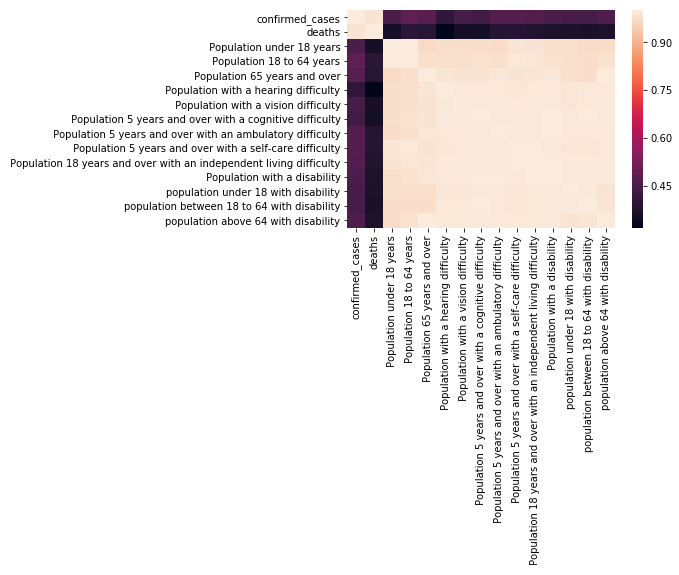

In [25]:
sns.heatmap(final_table.corr())

In [26]:
print(list(final_table.columns))

['confirmed_cases', 'deaths', '\xa0Population under 18 years', '\xa0Population 18 to 64 years', '\xa0Population 65 years and over', '\xa0Population with a hearing difficulty', '\xa0Population with a vision difficulty', '\xa0Population 5 years and over with a cognitive difficulty', '\xa0Population 5 years and over with an ambulatory difficulty', '\xa0Population 5 years and over with a self-care difficulty', '\xa0Population 18 years and over with an independent living difficulty', '\xa0Population with a disability', 'population under 18 with disability', 'population between 18 to 64 with disability', 'population above 64 with disability', 'Population']


In [27]:
final_table["%of population corona affected"]=(final_table["confirmed_cases"]/final_table["Population"])*100
final_table["Mortality Rate"]=(final_table["deaths"]/final_table["Population"])*100
final_table["Fatality Rate"]=(final_table["deaths"]/final_table["confirmed_cases"])

In [28]:
final_table["%of population with disability"]=(final_table['\xa0Population with a disability']/final_table["Population"])*100
final_table["%of population with vision difficulty"]=(final_table['\xa0Population with a vision difficulty']/final_table["Population"])*100
final_table["%of population with hearing difficulty"]=(final_table['\xa0Population with a hearing difficulty']/final_table["Population"])*100
final_table["%of population 5 years and over with an ambulatory difficulty"]=(final_table['\xa0Population 5 years and over with an ambulatory difficulty']/final_table["Population"])*100

In [29]:
final_table.head()

,confirmed_cases,deaths,Population under 18 years,Population 18 to 64 years,Population 65 years and over,Population with a hearing difficulty,Population with a vision difficulty,Population 5 years and over with a cognitive difficulty,Population 5 years and over with an ambulatory difficulty,Population 5 years and over with a self-care difficulty,...,population between 18 to 64 with disability,population above 64 with disability,Population,%of population corona affected,Mortality Rate,Fatality Rate,%of population with disability,%of population with vision difficulty,%of population with hearing difficulty,%of population 5 years and over with an ambulatory difficulty
Alabama,1474,90,1097072,2924082,763886,203134,145490,295224,445331,155154,...,416469,312156,4903185,0.0300621,0.00183554,0.061058,15.9206,2.96725,4.1429,9.08248
Alaska,195,4,185685,451328,77093,32428,17152,30196,38460,14588,...,49019,30148,731545,0.0266559,0.000546788,0.020513,11.7416,2.34463,4.43281,5.25737
Arizona,5988,250,1631619,4059983,1146668,279497,169657,318457,453483,160957,...,425886,393548,7278717,0.0822672,0.00343467,0.041750,12.16,2.33086,3.83992,6.23026
Arkansas,941,23,703847,1761927,471361,144985,101641,189628,278592,97807,...,268473,197401,3017804,0.0311816,0.000762144,0.024442,16.7638,3.36805,4.80432,9.23161
California,32258,1569,9059370,24374529,5220049,1140654,772344,1565088,2127363,951653,...,1971981,1822612,39512223,0.0816406,0.00397092,0.048639,10.3504,1.9547,2.88684,5.38406


# PLOTS with No. of Corona Cases as Y-axis 

In [30]:
final_table.iplot(kind='scatter',x='%of population with disability',y='%of population corona affected',mode='markers',size=10,xTitle="%of population with disability",yTitle="%of population corona affected")


In [31]:
final_table.iplot(kind='scatter',x='%of population with vision difficulty',y='%of population corona affected',mode='markers',size=10,xTitle="%of population with vision difficulty",yTitle="%of population corona affected")

In [32]:
final_table.iplot(kind='scatter',x='%of population with hearing difficulty',y='%of population corona affected',mode='markers',size=10,xTitle="%of population with hearing difficulty",yTitle="%of population corona affected")

In [33]:
final_table.iplot(kind='scatter',x='%of population 5 years and over with an ambulatory difficulty',y='%of population corona affected',mode='markers',size=10,xTitle="%of population 5 years and over with an ambulatory difficulty",yTitle="%of population corona affected")

# PLOTS with Mortality rate as y-axis

In [34]:
final_table.iplot(kind='scatter',x='%of population with disability',y='Mortality Rate',mode='markers',size=10,xTitle="%of population with disability",yTitle="Mortality Rate")

In [35]:
final_table.iplot(kind='scatter',x='%of population with vision difficulty',y='Mortality Rate',mode='markers',size=10,xTitle="%of population with vision difficulty",yTitle="Mortality Rate")

In [36]:
final_table.iplot(kind='scatter',x='%of population with hearing difficulty',y='Mortality Rate',mode='markers',size=10,xTitle="%of population with hearing difficulty",yTitle="Mortality Rate")

In [37]:
final_table.iplot(kind='scatter',x='%of population 5 years and over with an ambulatory difficulty',y='Mortality Rate',mode='markers',size=10,xTitle="%of population 5 years and over with an ambulatory difficulty",yTitle="Mortality Rate")

# Plots with Fatality rate as Y-axis 

In [38]:
final_table.iplot(kind='scatter',x='%of population with disability',y='Fatality Rate',mode='markers',size=10,xTitle="%of population with disability",yTitle="Fatality Rate")

In [39]:
final_table.iplot(kind='scatter',x='%of population with vision difficulty',y='Fatality Rate',mode='markers',size=10,xTitle="%of population with vision difficulty",yTitle="Fatality Rate")

In [40]:
final_table.iplot(kind='scatter',x='%of population with hearing difficulty',y='Fatality Rate',mode='markers',size=10,xTitle="%of population with hearing difficulty",yTitle="Fatality Rate")

In [41]:
final_table.iplot(kind='scatter',x='%of population 5 years and over with an ambulatory difficulty',y='Fatality Rate',mode='markers',size=10,xTitle="%of population 5 years and over with an ambulatory difficulty",yTitle="Fatality Rate")